# Ayiti Analytics capstone project

## Exploring Background of different professional in Haiti from LinkedIn

### Project Description

#### contextual setting:
why college graduates can’t find a job or a good job? 
Obtaining employment after college is often difficult. Some graduates accept the first job they
find without realizing the potential impact it may have on their future. The primary reason why
graduates find obtaining employment difficult is the sheer amount of competition. Not enough
opportunity overall in Haiti.

There are many reasons why graduates struggle in their job searching. Personal reasons aside,
there are greater causes that many students and recent graduates face such as:
* High competition
* Little work experience
* Few or no skills at all
* Little networking
* Lack of communication skills

Furthermore, I want to focus farther i.e. the choice of the field of study after high school. In
Haiti, we do not offer professional orientation to young people. Before choosing a study field,
wouldn't it be important to have a clear idea of the opportunities offered in this field, and the skills
to be acquired?

what degree or level of education that offer more opportunities or that is the most in
demand, what skills are employers looking for? This lead me to explore the backgrounds,
experiences, and skills of different professionals in Haiti. For this project I want to study the

profile of different professionals, and their evolution after graduation. I want to look at their
background, the skills they have acquired, and the opportunities they have had.

#### Targeted Audience

Graduated high school students will be able to use this study to obtain information on the most
demanded study fields.
Undergraduate students to get information such whether or not a graduate degree (master’s
degree) to get more opportunities in their field of study

#### Data Source and acquisition

I want to scrape LinkedIn. LinkedIn is a social network for professionals making it the
Facebook for your career. This platform is the best for networking with others within your
industry or an industry the user may be trying to enter. Not only is this platform great for
social networking but it's also great for job searches! So I decided to do my web-scraping
project on LinkedIn.

I will use selenium and beautiful soup to web-scrape different LinkedIn profiles of people
located in Haiti.

##### Scrapping LinkedIn to find link profile of different people in Haiti

In [121]:
# Load libraries
import requests
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [124]:
# Create values Selenium
USERNAME = "billyturner976@gmail.com" 
PASSWORD =  "@B1o0b1@Billyturner@"
linkedin = 'https://www.linkedin.com'

In [125]:
# Open Selenium
browser = webdriver.Chrome()
browser.get(linkedin)
time.sleep(3)
# Identify email and password inputs and enter in information
email = browser.find_element_by_name('session_key')
password = browser.find_element_by_name('session_password')
email.send_keys(USERNAME + Keys.RETURN)
password.send_keys(PASSWORD + Keys.RETURN)
time.sleep(3)

##  Step 1

I want to build a data set of at least one thousand profiles. 

LinkedIn puts restrictions on its page to prevent scrapping. 


When you use the LinkedIn filter to search, if you search for people and filter by a specific country, you can get 100 pages with less than 11 people per page. it can be 10 or 5 people per page. 
In order to build my dataset, i will scrape linkedIn by searching for people and filter one by one for Haiti, some universities in Haiti, some companies in Haiti.

In [ ]:
# Go to search page and scroll to the bottom of the page to load elements of the page
search = "https://www.linkedin.com/search/results/people/?facetGeoRegion=%5B%22ht%3A0%22%5D&origin=FACETED_SEARCH"
browser.get(search)
time.sleep(3)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
current_url = 'url_placeholder' # this is a placeholder for the URL check
# Create empty dataframe
df = pd.DataFrame(columns = ['name', 'title', 'location', 'profile'])

debut_url = 'https://www.linkedin.com/search/results/people/?keywords=haiti&origin=SWITCH_SEARCH_VERTICAL&page='

for i in range(100):
    Final_url = debut_url + str(i)
    browser.get(Final_url)
    time.sleep(3)
    
    page = BeautifulSoup(browser.page_source, 'lxml')
    page_names = page.find_all('span', class_ = 'actor-name')
    page_titles = page.find_all('p', class_ = 'subline-level-1')
    page_locations = page.find_all('p', class_ = 'subline-level-2')
    page_profiles = page.find_all('a', class_ = 'search-result__result-link')
    
    # Put scraped data into a dataframe
    names = list(map(lambda x: x.text, page_names))
    titles = list(map(lambda x: x.text.replace('\n', ''), page_titles))
    locations = list(map(lambda x: x.text.replace('\n', ''), page_locations))
    profiles = list(map(lambda x: linkedin + x['href'], page_profiles))[::2]
    temp = pd.DataFrame({'name':names, 'title':titles, 'location':locations, 'profile':profiles})
    
    # Filter out members who do not provide information
    temp = temp[temp['name'] != 'LinkedIn Member']
    if temp.shape[0]<10:
        print(len(temp))
    # Append new data to df
    df = df.append(temp)
    
     # Stop appending if the number of retrieved records exceeds the limit
    if df.shape[0] >= 1000:
        break
    time.sleep(3)
        
# Reset dataframe index
df.reset_index()

# Export results
#df.to_csv("output_search.csv", index = False)

# Close Selenium
browser.quit()

In [19]:
# Create values Selenium
USERNAME = "chosson.jeanfranco@gmail.com" 
PASSWORD =  "**********************"
linkedin = 'https://www.linkedin.com'
# Open Selenium
browser = webdriver.Chrome()
browser.get(linkedin)
time.sleep(3)
# Identify email and password inputs and enter in information
email = browser.find_element_by_name('session_key')
password = browser.find_element_by_name('session_password')
email.send_keys(USERNAME + Keys.RETURN)
password.send_keys(PASSWORD + Keys.RETURN)
# Go to profile page and scroll to the bottom of the page to load elements of the page
time.sleep(3)
search = "https://www.linkedin.com/search/results/people/?facetSchool=%5B%22162070%22%2C%225097000%22%5D&origin=FACETED_SEARCH"
browser.get(search)
time.sleep(3)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
current_url = 'url_placeholder' # this is a placeholder for the URL check
# Create empty dataframe
df = pd.DataFrame(columns = ['name', 'title', 'location', 'profile'])

debut_url = 'https://www.linkedin.com/search/results/people/?facetSchool=%5B%22162070%22%2C%225097000%22%5D&origin=FACETED_SEARCH&page='

for i in range(100):
    Final_url = debut_url + str(i)
    browser.get(Final_url)
    time.sleep(3)
    
    page = BeautifulSoup(browser.page_source, 'lxml')
    page_names = page.find_all('span', class_ = 'actor-name')
    page_titles = page.find_all('p', class_ = 'subline-level-1')
    page_locations = page.find_all('p', class_ = 'subline-level-2')
    page_profiles = page.find_all('a', class_ = 'search-result__result-link')
    
    # Put scraped data into a dataframe
    names = list(map(lambda x: x.text, page_names))
    titles = list(map(lambda x: x.text.replace('\n', ''), page_titles))
    locations = list(map(lambda x: x.text.replace('\n', ''), page_locations))
    profiles = list(map(lambda x: linkedin + x['href'], page_profiles))[::2]
    temp = pd.DataFrame({'name':names, 'title':titles, 'location':locations, 'profile':profiles})
    
    # Filter out members who do not provide information
    temp = temp[temp['name'] != 'LinkedIn Member']
    
    # Append new data to df
    df = df.append(temp)
    
     # Stop appending if the number of retrieved records exceeds the limit
    if df.shape[0] >= 1000:
        break
    time.sleep(3)
        
# Reset dataframe index
df.reset_index()

# Export results
df.to_csv("output_search1.csv", index = False)

# Close Selenium
browser.quit()

In [22]:
# Create values Selenium
USERNAME = "chosson.jeanfranco@gmail.com" 
PASSWORD =  "*************************"
linkedin = 'https://www.linkedin.com'
# Open Selenium
browser = webdriver.Chrome()
browser.get(linkedin)
time.sleep(3)
# Identify email and password inputs and enter in information
email = browser.find_element_by_name('session_key')
password = browser.find_element_by_name('session_password')
email.send_keys(USERNAME + Keys.RETURN)
password.send_keys(PASSWORD + Keys.RETURN)
# Go to profile page and scroll to the bottom of the page to load elements of the page
time.sleep(3)

search = "https://www.linkedin.com/search/results/people/?facetPastCompany=%5B%22163457%22%2C%22767299%22%2C%225654%22%2C%221860%22%2C%221964533%22%5D&origin=FACETED_SEARCH"
browser.get(search)
time.sleep(3)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
current_url = 'url_placeholder' # this is a placeholder for the URL check
# Create empty dataframe
df = pd.DataFrame(columns = ['name', 'title', 'location', 'profile'])

debut_url = 'https://www.linkedin.com/search/results/people/?facetPastCompany=%5B%22163457%22%2C%22767299%22%2C%225654%22%2C%221860%22%2C%221964533%22%5D&origin=FACETED_SEARCH&page='

for i in range(100):
    Final_url = debut_url + str(i)
    browser.get(Final_url)
    time.sleep(3)
    
    page = BeautifulSoup(browser.page_source, 'lxml')
    page_names = page.find_all('span', class_ = 'actor-name')
    page_titles = page.find_all('p', class_ = 'subline-level-1')
    page_locations = page.find_all('p', class_ = 'subline-level-2')
    page_profiles = page.find_all('a', class_ = 'search-result__result-link')
    
    # Put scraped data into a dataframe
    names = list(map(lambda x: x.text, page_names))
    titles = list(map(lambda x: x.text.replace('\n', ''), page_titles))
    locations = list(map(lambda x: x.text.replace('\n', ''), page_locations))
    profiles = list(map(lambda x: linkedin + x['href'], page_profiles))[::2]
    temp = pd.DataFrame({'name':names, 'title':titles, 'location':locations, 'profile':profiles})
    
    # Filter out members who do not provide information
    temp = temp[temp['name'] != 'LinkedIn Member']
    
    # Append new data to df
    df = df.append(temp)
    
     # Stop appending if the number of retrieved records exceeds the limit
    if df.shape[0] >= 1000:
        break
    time.sleep(3)
        
# Reset dataframe index
df.reset_index()

# Export results
df.to_csv("output_search2.csv", index = False)

# Close Selenium
browser.quit()

##### Load the three datasets

In [26]:
df = pd.read_csv('output_search.csv')
df1 = pd.read_csv('output_search1.csv')
df2 = pd.read_csv('output_search2.csv')

In [33]:
## Concat the three datasets into result
result = pd.concat([df, df1, df2], axis=0)

###### Drop duplicates values on profile

In [34]:
result.drop_duplicates(subset ="profile", keep = False, inplace = True)

In [44]:
### make sure all the profile is from people in Haiti
new_result = result[result['location'].str.contains('Haiti')]

In [46]:
## save dataset into a csv file.
new_result.to_csv("result.csv", index = False)

In [47]:
new_result['location'].value_counts()

        Haiti                                       1050
        Port-au-Prince, Haiti                         57
        Port-au-Prince Arrondissement, Haiti           8
        Pétionville, Haiti                             4
        Gros-Morne Arrondissement, Haiti               1
        Jacmel Arrondissement, Haiti                   1
        Trou-du-Nord Arrondissement, Haiti             1
        Carrefour, Haiti                               1
        Les Cayes Arrondissement, Haiti                1
        Delmas, Haiti                                  1
Name: location, dtype: int64

In [48]:
new_result.shape

(1125, 4)

##### We have dataset of 1125 profiles

## Step 2

From those profiles, i want to get their background, education, (Bachelor degree's or master degree's), their study fields, Their experiences and their skills. 
i'm gonna do another scrape, to get those informations from the differents profiles i get before.

In [ ]:
r = pd.read_csv("result.csv")

In [ ]:
#create empty data frame
Exp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
Edu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
Ski_df = pd.DataFrame(columns = ['profile', 'skill'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in r.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(3)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(1800)
    
#Experience Section  
    titles = page.find_all('div', class_ = "pv-entity__position-group-pager")
    companies = page.find_all('span', class_ = "pv-entity__secondary-title")
    dates = page.find_all('h4', class_ = "pv-entity__date-range")

    #Put scraped data into exp_df

    arraylen1 = len(page.find_all('div', class_ = "pv-entity__position-group-pager"))

    profile = link
    exp_titles = list(map(lambda x: x.h3.text.strip(), titles))[0:arraylen1]
    exp_companies = list(map(lambda x: x.text.strip(), companies))[0:arraylen1]
    exp_dates = list(map(lambda x: x.text.strip().split('\n')[-1], dates))[0:arraylen1]
    
 #Education Section 
    institution = page.find_all('div', class_ = "pv-entity__degree-info")
    degree = page.find_all('p', class_ = "pv-entity__degree-name")
    dates = page.find_all('p', class_ = "pv-entity__dates")
 
    #Put scraped data into edu_df
    
    arraylen2 = len(page.find_all('div', class_ = "pv-entity__degree-info"))

    profile = link
    ed_name = list(map(lambda x: x.text.strip().split('\n')[-1], institution))[0:arraylen2]
    ed_deg = list(map(lambda x: x.text.strip().split('\n')[-1], degree))[0:arraylen2]
    ed_dates = list(map(lambda x: x.text.strip().split('\n')[-1], dates))[0:arraylen2]
    if len(ed_dates) < arraylen2:
        ed_dates = 'NA'
 #Skill Section 
    skill = page.find_all('span', class_ = "pv-skill-category-entity__name-text")
    
    #Put scraped data into a ski_df
    
    arraylen3 = len(page.find_all('span', class_ = "pv-skill-category-entity__name-text"))
        
    profile = link
    skill = list(map(lambda x: x.text.strip(), skill))[0:arraylen3]
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
    temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
    Exp_df = Exp_df.append(temp1)
    Edu_df = Edu_df.append(temp2)
    Ski_df = Ski_df.append(temp3)

I've been dealing with linkedIn's restrictions such as captcha, and I'm being asked to re-authenticate after an amount of request. 
so i need to repeat the process several times. 

In [ ]:
#create empty data frame
Exp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
Edu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
Ski_df = pd.DataFrame(columns = ['profile', 'skill'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in r.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(5)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(1000)
    
    
#Experience Section
    tall = page.find_all('li', class_ = "pv-entity__position-group-pager pv-profile-section__list-item ember-view")
    titles = []
    companies = []
    dates = []
    
    for li in tall:
        _title = li.find_all('h3','t-16 t-black t-bold')
        _companies = li.find_all('p','pv-entity__secondary-title t-14 t-black t-normal')
        _dates = li.find_all('span', class_ = "pv-entity__bullet-item-v2")
        if _title:
            titles.append(_title[0].get_text().strip()) 
        else:
             titles.append('')
        if _companies:
            companies.append(_companies[0].get_text().strip()) 
        else:
             companies.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
        print(companies)
    #Put scraped data into exp_df


    profile = link
    exp_titles = titles
    exp_companies =  companies
    exp_dates = dates
    
    #Education Section
    tall = page.find_all('li', class_ = "pv-profile-section__list-item pv-education-entity pv-profile-section__card-item ember-view")
    study_name = [] 
    degree = []
    dates = []
    
    for li in tall:
        _std_name = li.find_all('p','pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal')
        _deg = li.find_all('p','pv-entity__secondary-title pv-entity__degree-name t-14 t-black t-normal')
        _dates = li.find_all('p', class_ = "pv-entity__dates t-14 t-black--light t-normal  time")
        if _std_name:
            _study_name = _std_name[0].find_all('span', 'pv-entity__comma-item')
            study_name.append(_study_name[0].get_text().strip()) 
        else:
             study_name.append('')
        if _deg:
            _degree = _deg[0].find_all('span', 'pv-entity__comma-item')
            degree.append(_degree[0].get_text().strip()) 
        else:
             degree.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
                
    ed_name = study_name
    ed_deg = degree
    ed_dates = dates
                
    #Skill Section 
    tall = page.find_all('li', class_ = "pv-skill-category-entity__top-skill pv-skill-category-entity pb3 pt4 pv-skill-endorsedSkill-entity relative ember-view")
    skill = []
    
    for li in tall:
        _skill = li.find_all('span','pv-skill-category-entity__name-text t-16 t-black t-bold')
        if _skill:
            skill.append(_skill[0].get_text().strip()) 
        else:
             skill.append('')

        
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
    temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
    Exp_df = Exp_df.append(temp1)
    Edu_df = Edu_df.append(temp2)
    Ski_df = Ski_df.append(temp3)
    print(link, 'completed')
   

Exp_df.to_csv('experience.csv')
Edu_df.to_csv('education.csv')
Ski_df.to_csv('skill.csv')

### I was able to scrape 559 profiles

In [ ]:
newR = r.tail(566)

In [ ]:
#create empty data frame
newExp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
newEdu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
newSki_df = pd.DataFrame(columns = ['profile', 'skill'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in newR.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(5)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(1000)
    
    
#Experience Section
    tall = page.find_all('li', class_ = "pv-entity__position-group-pager pv-profile-section__list-item ember-view")
    titles = []
    companies = []
    dates = []
    
    for li in tall:
        _title = li.find_all('h3','t-16 t-black t-bold')
        _companies = li.find_all('p','pv-entity__secondary-title t-14 t-black t-normal')
        _dates = li.find_all('span', class_ = "pv-entity__bullet-item-v2")
        if _title:
            titles.append(_title[0].get_text().strip()) 
        else:
             titles.append('')
        if _companies:
            companies.append(_companies[0].get_text().strip()) 
        else:
             companies.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
        print(companies)
    #Put scraped data into exp_df


    profile = link
    exp_titles = titles
    exp_companies =  companies
    exp_dates = dates
    
    #Education Section
    tall = page.find_all('li', class_ = "pv-profile-section__list-item pv-education-entity pv-profile-section__card-item ember-view")
    study_name = [] 
    degree = []
    dates = []
    
    for li in tall:
        _std_name = li.find_all('p','pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal')
        _deg = li.find_all('p','pv-entity__secondary-title pv-entity__degree-name t-14 t-black t-normal')
        _dates = li.find_all('p', class_ = "pv-entity__dates t-14 t-black--light t-normal  time")
        if _std_name:
            _study_name = _std_name[0].find_all('span', 'pv-entity__comma-item')
            study_name.append(_study_name[0].get_text().strip()) 
        else:
             study_name.append('')
        if _deg:
            _degree = _deg[0].find_all('span', 'pv-entity__comma-item')
            degree.append(_degree[0].get_text().strip()) 
        else:
             degree.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
                
    ed_name = study_name
    ed_deg = degree
    ed_dates = dates
                
    #Skill Section 
    tall = page.find_all('li', class_ = "pv-skill-category-entity__top-skill pv-skill-category-entity pb3 pt4 pv-skill-endorsedSkill-entity relative ember-view")
    skill = []
    
    for li in tall:
        _skill = li.find_all('span','pv-skill-category-entity__name-text t-16 t-black t-bold')
        if _skill:
            skill.append(_skill[0].get_text().strip()) 
        else:
             skill.append('')

        
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
    temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
    newExp_df = newExp_df.append(temp1)
    newEdu_df = newEdu_df.append(temp2)
    newSki_df = newSki_df.append(temp3)
    print(link, 'completed')
   

newExp_df.to_csv('experience2.csv')
newEdu_df.to_csv('education2.csv')
newSki_df.to_csv('skill2.csv')

### for the next time i was able to get informations from 256 others profiles.

In [ ]:
new_R = newR.tail(310)

In [ ]:
#create empty data frame
newExp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
newEdu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
newSki_df = pd.DataFrame(columns = ['profile', 'skill'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in new_R.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(5)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(900)
    
    
#Experience Section
    tall = page.find_all('li', class_ = "pv-entity__position-group-pager pv-profile-section__list-item ember-view")
    titles = []
    companies = []
    dates = []
    
    for li in tall:
        _title = li.find_all('h3','t-16 t-black t-bold')
        _companies = li.find_all('p','pv-entity__secondary-title t-14 t-black t-normal')
        _dates = li.find_all('span', class_ = "pv-entity__bullet-item-v2")
        if _title:
            titles.append(_title[0].get_text().strip()) 
        else:
             titles.append('')
        if _companies:
            companies.append(_companies[0].get_text().strip()) 
        else:
             companies.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
        print(companies)
    #Put scraped data into exp_df


    profile = link
    exp_titles = titles
    exp_companies =  companies
    exp_dates = dates
    
    #Education Section
    tall = page.find_all('li', class_ = "pv-profile-section__list-item pv-education-entity pv-profile-section__card-item ember-view")
    study_name = [] 
    degree = []
    dates = []
    
    for li in tall:
        _std_name = li.find_all('p','pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal')
        _deg = li.find_all('p','pv-entity__secondary-title pv-entity__degree-name t-14 t-black t-normal')
        _dates = li.find_all('p', class_ = "pv-entity__dates t-14 t-black--light t-normal  time")
        if _std_name:
            _study_name = _std_name[0].find_all('span', 'pv-entity__comma-item')
            study_name.append(_study_name[0].get_text().strip()) 
        else:
             study_name.append('')
        if _deg:
            _degree = _deg[0].find_all('span', 'pv-entity__comma-item')
            degree.append(_degree[0].get_text().strip()) 
        else:
             degree.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
                
    ed_name = study_name
    ed_deg = degree
    ed_dates = dates
                
    #Skill Section 
    tall = page.find_all('li', class_ = "pv-skill-category-entity__top-skill pv-skill-category-entity pb3 pt4 pv-skill-endorsedSkill-entity relative ember-view")
    skill = []
    
    for li in tall:
        _skill = li.find_all('span','pv-skill-category-entity__name-text t-16 t-black t-bold')
        if _skill:
            skill.append(_skill[0].get_text().strip()) 
        else:
             skill.append('')

        
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
    temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
    newExp_df = newExp_df.append(temp1)
    newEdu_df = newEdu_df.append(temp2)
    newSki_df = newSki_df.append(temp3)
    print(link, 'completed')
    print(tcounter)
    if tcounter  == 210:
        break
   

newExp_df.to_csv('experience3.csv')
newEdu_df.to_csv('education3.csv')
newSki_df.to_csv('skill3.csv')

### In that time i was able to get informations from 200 profiles.

In [ ]:
done_R = new_R.tail(110)

In [ ]:
#create empty data frame
newExp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
newEdu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
newSki_df = pd.DataFrame(columns = ['profile', 'skill'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in done_R.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(5)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(900)
    
    
#Experience Section
    tall = page.find_all('li', class_ = "pv-entity__position-group-pager pv-profile-section__list-item ember-view")
    titles = []
    companies = []
    dates = []
    
    for li in tall:
        _title = li.find_all('h3','t-16 t-black t-bold')
        _companies = li.find_all('p','pv-entity__secondary-title t-14 t-black t-normal')
        _dates = li.find_all('span', class_ = "pv-entity__bullet-item-v2")
        if _title:
            titles.append(_title[0].get_text().strip()) 
        else:
             titles.append('')
        if _companies:
            companies.append(_companies[0].get_text().strip()) 
        else:
             companies.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
    #Put scraped data into exp_df


    profile = link
    exp_titles = titles
    exp_companies =  companies
    exp_dates = dates
    
    #Education Section
    tall = page.find_all('li', class_ = "pv-profile-section__list-item pv-education-entity pv-profile-section__card-item ember-view")
    study_name = [] 
    degree = []
    dates = []
    
    for li in tall:
        _std_name = li.find_all('p','pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal')
        _deg = li.find_all('p','pv-entity__secondary-title pv-entity__degree-name t-14 t-black t-normal')
        _dates = li.find_all('p', class_ = "pv-entity__dates t-14 t-black--light t-normal  time")
        if _std_name:
            _study_name = _std_name[0].find_all('span', 'pv-entity__comma-item')
            study_name.append(_study_name[0].get_text().strip()) 
        else:
             study_name.append('')
        if _deg:
            _degree = _deg[0].find_all('span', 'pv-entity__comma-item')
            degree.append(_degree[0].get_text().strip()) 
        else:
             degree.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
                
    ed_name = study_name
    ed_deg = degree
    ed_dates = dates
                
    #Skill Section 
    tall = page.find_all('li', class_ = "pv-skill-category-entity__top-skill pv-skill-category-entity pb3 pt4 pv-skill-endorsedSkill-entity relative ember-view")
    skill = []
    
    for li in tall:
        _skill = li.find_all('span','pv-skill-category-entity__name-text t-16 t-black t-bold')
        if _skill:
            skill.append(_skill[0].get_text().strip()) 
        else:
             skill.append('')

        
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
    temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
    newExp_df = newExp_df.append(temp1)
    newEdu_df = newEdu_df.append(temp2)
    newSki_df = newSki_df.append(temp3)
    print(link, 'completed')
    print(tcounter)
   

newExp_df.to_csv('experience4.csv')
newEdu_df.to_csv('education4.csv')
newSki_df.to_csv('skill4.csv')

### Finally i was able to get informations from all the profiles, of course those that had informations. Then i have 12 datasets, 4 for each, experience, education and skill.

## step 3

load these datasets in 3 datasets, for each category.

In [4]:
csv_file_list = ["experience.csv", "experience2.csv", "experience3.csv", "experience4.csv"]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

experience_df = pd.concat(list_of_dataframes)

csv_file_list = ["education.csv", "education2.csv", "education3.csv", "education4.csv"]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

education_df = pd.concat(list_of_dataframes)

csv_file_list = ["skill.csv", "skill2.csv", "skill3.csv", "skill4.csv"]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

skill_df = pd.concat(list_of_dataframes)

In [5]:
experience_df.drop('Unnamed: 0', axis = 1, inplace = True)
education_df.drop('Unnamed: 0', axis = 1, inplace = True)
skill_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
#display first 5 rows
experience_df.head()

,profile,exp_title,exp_company,exp_dates
0,https://www.linkedin.com/in/joseph-melior-3a4a...,CEO,CHOCOMAX-HAITI,6 yrs 7 mos
1,https://www.linkedin.com/in/alexandre-michel-0...,Rédacteur,"Journal l'Union, Haïti",2 yrs 9 mos
2,https://www.linkedin.com/in/alexandre-michel-0...,Directeur exécutif,Tras-Haïti\n Self-employed,2 yrs 5 mos
3,https://www.linkedin.com/in/biento-jacques-871...,Co-Founder,GBI Haiti,1 yr 9 mos
4,https://www.linkedin.com/in/valery-fils-aime-6...,Co-fondateur et Resp. de partenariats,Haiti Climat\n Part-time,2 yrs 10 mos


In [7]:
#display first 5 rows
education_df.head()

,profile,ed_name,ed_deg,ed_dates
0,https://www.linkedin.com/in/joseph-melior-3a4a...,Law,Bachelor's degree,NaN
1,https://www.linkedin.com/in/joseph-melior-3a4a...,Sociologie,Licentiate degree,NaN
2,https://www.linkedin.com/in/alexandre-michel-0...,Sciences de la Communication et des relations ...,Licence,NaN
3,https://www.linkedin.com/in/biento-jacques-871...,Photography,Diplome,NaN
4,https://www.linkedin.com/in/biento-jacques-871...,Broadcast Journalism,Bachelor's degree,NaN


In [105]:
#display first 5 rows
skill_df.head()

,profile,skill
0,https://www.linkedin.com/in/joseph-melior-3a4a...,Strategic Planning
1,https://www.linkedin.com/in/joseph-melior-3a4a...,Public Speaking
2,https://www.linkedin.com/in/joseph-melior-3a4a...,Business Strategy
3,https://www.linkedin.com/in/biento-jacques-871...,Graphic Design
4,https://www.linkedin.com/in/biento-jacques-871...,Video Production


### Data analysis

In [106]:
display(experience_df.info())
display(education_df.info())
display(skill_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3210 entries, 0 to 385
Data columns (total 4 columns):
profile        3210 non-null object
exp_title      3209 non-null object
exp_company    2870 non-null object
exp_dates      3162 non-null object
dtypes: object(4)
memory usage: 125.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 203
Data columns (total 4 columns):
profile     2003 non-null object
ed_name     1658 non-null object
ed_deg      1539 non-null object
ed_dates    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 78.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 250
Data columns (total 2 columns):
profile    2258 non-null object
skill      2258 non-null object
dtypes: object(2)
memory usage: 52.9+ KB


None

I noticed that in the dataset of experience from a certain rows the scrape doesn't give well the duration for the experience.
so i have to rescrape this part.

In [ ]:
## 423 last rows don't provide the experience time
weird = experience_df.tail(423)

weird.reset_index(inplace = True)

weird.drop('index', axis = 1, inplace = True)

check_weird = pd.DataFrame({'profile': weird['profile'].unique()})

In [ ]:
#create empty data frame
weirdExp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in check_weird.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(5)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(900)
    
    
#Experience Section
    tall = page.find_all('li', class_ = "pv-entity__position-group-pager pv-profile-section__list-item ember-view")
    titles = []
    companies = []
    dates = []
    
    for li in tall:
        _title = li.find_all('h3','t-16 t-black t-bold')
        _companies = li.find_all('p','pv-entity__secondary-title t-14 t-black t-normal')
        _dates = li.find_all('span', class_ = "pv-entity__bullet-item-v2")
        if _title:
            titles.append(_title[0].get_text().strip()) 
        else:
             titles.append('')
        if _companies:
            companies.append(_companies[0].get_text().strip()) 
        else:
             companies.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
    #Put scraped data into exp_df


    profile = link
    exp_titles = titles
    exp_companies =  companies
    exp_dates = dates

        
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    weirdExp_df = weirdExp_df.append(temp1)
    print(link, 'completed')
    print(tcounter)
   

weirdExp_df.to_csv('weirdExp_df.csv')

In [128]:
 browser.quit()

In [131]:
weirdExp_df = weirdExp_df.reset_index()

In [132]:
weirdExp_df.drop('index', axis = 1, inplace = True)

In [ ]:
experience_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
## Drop the rows that i had to rescrape
experience_df.drop(experience_df.index[range(2402, 2825)], axis=0, inplace = True)

In [ ]:
## Concat the two datasets 
experience_final = pd.concat([experience_df,weirdExp_df])

experience_final.reset_index(inplace = True)

experience_final.drop('index', axis = 1, inplace = True)

In [ ]:
## Drop missing values
experience_final.dropna(inplace = True)

i am going to convert the column 'exp_date' in order to have the time experience in years only.

In [ ]:
date = experience_final['exp_dates'].str.split(" ", n = 3, expand = True)

date['part1'] = date[0] + ', ' + date[1]
date['part2'] = date[2] + ', ' + date[3]

date.drop([0,1,2,3], axis = 1, inplace = True)

date = date.fillna(0)

for index, row in date.iterrows():
    #print(index,row[0], row[1])
    date.loc[index,'part1'] =  str(date.loc[index,'part1']).replace('yrs', '')
    date.loc[index,'part1'] =  str(date.loc[index,'part1']).replace('yr', '')
    date.loc[index,'part1'] =  str(date.loc[index,'part1']).replace(', ', '')
    date.loc[index,'part2'] =  str(date.loc[index,'part2']).replace(', ', '')
    if 'mos' in date.loc[index,'part1']:
        date.loc[index,'part1'] = str(round(float(str(date.loc[index,'part1']).replace('mos', ''))/12,1))
    if 'mo' in date.loc[index,'part1']:
        date.loc[index,'part1'] = str(round(float(str(date.loc[index,'part1']).replace('mo', ''))/12,1))
    if 'mos' in date.loc[index,'part2']:
        date.loc[index,'part2'] = str(round(float(str(date.loc[index,'part2']).replace('mos', ''))/12,1))
    if 'mo' in date.loc[index,'part2']:
        date.loc[index,'part2'] = str(round(float(str(date.loc[index,'part2']).replace('mo', ''))/12,1))
    if 'lessthan' in date.loc[index,'part1']:
        date.loc[index,'part1'] = str(date.loc[index,'part1']).replace('lessthan', '0.5')
    if 'ayear' in date.loc[index,'part2']:
        date.loc[index,'part2'] = str(date.loc[index,'part2']).replace('ayear', '0')
        
date['periode'] = date['part1'].astype(float) + date['part2'].astype(float)

date.drop(['part1', 'part2'], axis = 1, inplace = True)

In [ ]:
experience_final['periode'] = date['periode']

In [315]:
experience_final.head()

,profile,exp_title,exp_company,exp_dates,periode
0,https://www.linkedin.com/in/joseph-melior-3a4a...,CEO,CHOCOMAX-HAITI,6 yrs 7 mos,6.6
1,https://www.linkedin.com/in/alexandre-michel-0...,Rédacteur,"Journal l'Union, Haïti",2 yrs 9 mos,2.8
2,https://www.linkedin.com/in/alexandre-michel-0...,Directeur exécutif,Tras-Haïti\n Self-employed,2 yrs 5 mos,2.4
3,https://www.linkedin.com/in/biento-jacques-871...,Co-Founder,GBI Haiti,1 yr 9 mos,1.8
4,https://www.linkedin.com/in/valery-fils-aime-6...,Co-fondateur et Resp. de partenariats,Haiti Climat\n Part-time,2 yrs 10 mos,2.8


In [450]:
profile_list, title, periode_ = [], [], []

for profile_ in experience_final.profile.unique().tolist():
    profile_list.append(profile_)
    a__ = experience_final[(experience_final.profile == profile_)]
    b__ = a__[a__.periode == a__.periode.max()].reset_index()
    c__ = b__.loc[0,'exp_title']
    title.append(c__)
    periode_.append(experience_final[(experience_final.profile == profile_)]['periode'].max())

In [598]:
experience_grp = pd.DataFrame({'profile':profile_list, 'exp_title':title, 'periode':periode_})
experience_grp.head()

,profile,exp_title,periode
0,https://www.linkedin.com/in/joseph-melior-3a4a...,CEO,6.6
1,https://www.linkedin.com/in/alexandre-michel-0...,Rédacteur,2.8
2,https://www.linkedin.com/in/biento-jacques-871...,Co-Founder,1.8
3,https://www.linkedin.com/in/valery-fils-aime-6...,President,8.5
4,https://www.linkedin.com/in/mboute/,Co-Founder,7.2


## step 4

In [127]:
#Combining skills, experience, education tables for analysis later
from functools import reduce

frames = [skill_df, experience_df, education_df]
People = reduce(lambda  left,right: pd.merge(left,right,on=['profile'],
                                            how='outer'), frames)




In [8]:
experience_df.nunique()

profile        1005
exp_title      2367
exp_company    2376
exp_dates       226
dtype: int64

In [15]:
skill_df['skill'].nunique()

642

In [109]:
education_df.nunique()

profile     1012
ed_name      968
ed_deg       642
ed_dates       0
dtype: int64

In [28]:
import string

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
## Count the different unique skills and save it in a dataset
skill_csv = skill_df['skill'].value_counts().to_frame()
skill_csv.to_csv('skill_13.csv')

In [ ]:
experience_df['exp_title'].value_counts()

In [ ]:
education_df['ed_name'].value_counts()

In [ ]:
education_df['ed_deg'].value_counts()

In [49]:
experience_df['exp_title'].isnull().count() == len(experience_df['exp_title'])

True

In [110]:
experience_df.isna().sum()

profile          0
exp_title        1
exp_company    340
exp_dates       48
dtype: int64

In [111]:
skill_df.isna().sum()

profile    0
skill      0
dtype: int64

In [112]:
education_df.isna().sum()

profile        0
ed_name      345
ed_deg       464
ed_dates    2003
dtype: int64

### basic exploratory analysis in the skill column

In [378]:
skill_csv = pd.read_csv('skill_13.csv')

In [379]:
skill_csv['category 2'] = skill_csv['category 2'].str.lower() 

In [380]:
skill_df.drop(skill_df[(skill_df['skill'] == 'non lucratif') | (skill_df['skill'] == 'nonprofits') | (skill_df['skill'] == 'government') | (skill_df['skill'] == 'credit') | (skill_df['skill'] == 'delmas 30') | (skill_df['skill'] == 'e-mail') | (skill_df['skill'] == 'r') | (skill_df['skill'] == 'eviews') | (skill_df['skill'] == 'salesforce.com')].index, inplace = True)
skill_csv.drop(skill_csv[(skill_csv['skill_name'] == 'non lucratif') | (skill_csv['skill_name'] == 'nonprofits') | (skill_csv['skill_name'] == 'government') | (skill_csv['skill_name'] == 'credit') | (skill_csv['skill_name'] == 'delmas 30') | (skill_csv['skill_name'] == 'e-mail') | (skill_csv['skill'] == 'r') | (skill_csv['skill_name'] == 'eviews') | (skill_csv['skill_name'] == 'salesforce.com')].index, inplace = True)

In [381]:
skill_csv.rename(columns={'skill': 'count', 'skill_name': 'skill'}, inplace = True)

In [382]:
skill_csv.head()

,skill,count,Group,category 2
0,Microsoft Office,204.0,"Microsoft Office(word,excel,powerpoint,access)",technical & informations skills
1,Microsoft Excel,130.0,"Microsoft Office(word,excel,powerpoint,access)",technical & informations skills
2,Management,121.0,Management & Finance & Accounting,leadership & management
3,Leadership,114.0,NaN,leadership & management
4,Customer Service,78.0,NaN,leadership & management


In [383]:
newskill_df = skill_df.merge(skill_csv, on= 'skill', how = 'right')

In [384]:
newskill_df.drop('Group', axis = 1, inplace = True)

In [385]:
newskill_df.head()

,profile,skill,count,category 2
0,https://www.linkedin.com/in/joseph-melior-3a4a...,Strategic Planning,66.0,leadership & management
1,https://www.linkedin.com/in/myriam-narcisse-45...,Strategic Planning,66.0,leadership & management
2,https://www.linkedin.com/in/st%C3%A9phania-pet...,Strategic Planning,66.0,leadership & management
3,https://www.linkedin.com/in/daniel-gerard-rouz...,Strategic Planning,66.0,leadership & management
4,https://www.linkedin.com/in/gilbert-biamby-006...,Strategic Planning,66.0,leadership & management


In [480]:
newskill_df['profile'].nunique()

775

In [320]:
# Structure analysis
num_words = newskill_df['skill'].apply(lambda x: len(x.split()))
num_words_mean, num_words_std = np.mean(num_words), np.std(num_words)

num_sentences = newskill_df['skill'].apply(lambda x: len(re.split( '~ ...' ,'~'.join(x.split('.')))))
num_sentences_mean = np.mean(num_sentences)

In [321]:
display(num_words_mean)
display(num_sentences_mean)

1.7440212577502214

1.0

In [322]:
num_words_mean

1.7440212577502214

In [323]:
skill_words = list(newskill_df['skill'].str.lower().str.split(' ', expand=True).stack().unique())

In [326]:
skill_string = " ".join(sk for sk in newskill_df['skill'])

In [328]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

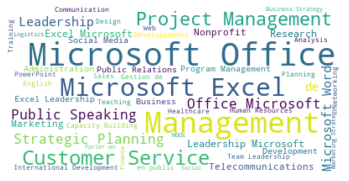

In [330]:
skill_wordcloud = WordCloud(background_color="white", 
                              max_words=50, 
                             ).generate(skill_string)

# view the wordcloud
plt.imshow(skill_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [386]:
newskill_df['category 2'].value_counts()

leadership & management            955
technical & informations skills    839
communication                      194
other                               74
analysis & research                 67
creativity                          56
medicine & healthcare               40
education & formation               34
Name: category 2, dtype: int64

In [555]:
newskill_df.head()

,profile,skill,count,category 2
0,https://www.linkedin.com/in/joseph-melior-3a4a...,Strategic Planning,66.0,leadership & management
1,https://www.linkedin.com/in/myriam-narcisse-45...,Strategic Planning,66.0,leadership & management
2,https://www.linkedin.com/in/st%C3%A9phania-pet...,Strategic Planning,66.0,leadership & management
3,https://www.linkedin.com/in/daniel-gerard-rouz...,Strategic Planning,66.0,leadership & management
4,https://www.linkedin.com/in/gilbert-biamby-006...,Strategic Planning,66.0,leadership & management


In [559]:
onecode_skill = newskill_df[['profile','category 2']]
onecode_skill = onecode_skill.rename(columns={'category 2': 'category_2'})

In [560]:
onecode_skill = pd.get_dummies(onecode_skill.category_2)

In [561]:
onecode_skill = pd.concat([newskill_df[['profile']], onecode_skill], axis = 1)

In [562]:
onecode_skill.rename(columns={'analysis & research ':'analysis & research'}, inplace = True)


In [638]:
onecode_skill = onecode_skill.groupby(['profile']).sum().reset_index()

In [639]:
onecode_skill.head()

,profile,analysis & research,communication,creativity,education & formation,leadership & management,medicine & healthcare,other,technical & informations skills
0,https://www.linkedin.com/in/abdel-abellard-007...,1,0,0,0,2,0,0,0
1,https://www.linkedin.com/in/abimaelle-chery-95...,0,2,0,0,1,0,0,0
2,https://www.linkedin.com/in/adler-barreau-a633...,0,0,0,0,1,0,0,2
3,https://www.linkedin.com/in/alainduret/,0,0,0,0,2,0,0,1
4,https://www.linkedin.com/in/alandy-blaise-5a26...,0,0,0,0,1,0,0,2


## basic exploratory in the education dataset

In [70]:
education_df.drop('ed_dates', axis = 1, inplace = True)

In [71]:
edu = education_df.dropna()

In [72]:
edu.reset_index(inplace = True)

In [73]:
edu.drop('index', axis = 1, inplace = True)

In [74]:
#Creating column to identify degree earned 

# Function to identify degree
def degree(x):
    if x.lower().find('master') != -1 or x.lower().find('ms') != -1 or x.lower().find('m.s') != -1 / 
    or x.lower().find('mba') != -1 or x.lower().find('m d') != -1:
        return(3)
    if x.lower().find('phd') != -1 or x.lower().find('p.hd') != -1 or x.lower().find('ph.d.') != -1 /
    or x.lower().find('ph.d') != -1:
        return(4)
    if x.lower().find('bachelor') != -1 or x.lower().find('ba') != -1 or x.lower().find('bs') != -1 /
    or x.lower().find('b.a') != -1 or x.lower().find('b.s') != -1 or x.lower().find('licence') != -1 /
    or x.lower().find('licentiate') != -1:
        return(2)
    else:
        return(0)

    
# Create degree column
edu['deg'] = list(map(degree, edu['ed_deg']))

#edu

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [77]:
edu.to_csv('edu.csv')

In [599]:
edu = pd.read_csv('edu.csv')

In [612]:
eduf = edu.groupby('profile')['deg'].max().to_frame().reset_index()
#eduf
eduf.head()

,profile,deg
0,https://www.linkedin.com/in/abdel-abellard-007...,3
1,https://www.linkedin.com/in/abimaelle-chery-95...,0
2,https://www.linkedin.com/in/abischamma-grand-j...,2
3,https://www.linkedin.com/in/achille-pierre-fil...,3
4,https://www.linkedin.com/in/adelin-pierre-b5b9...,1


In [613]:
eduf = edu[['profile','category', 'deg']].merge(eduf, on = 'profile', how = 'inner')

In [623]:
eduf = eduf.groupby('profile').max().reset_index().drop('deg_y', axis= 1).rename(columns={'deg_x': 'deg'})

In [624]:
map_dict ={0:'Other',1: 'Certificate & Minor Diplomas',2:'Bachelor',3: 'Master',4: 'Ph.D'}

In [625]:
eduf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 3 columns):
profile     796 non-null object
category    796 non-null object
deg         796 non-null int64
dtypes: int64(1), object(2)
memory usage: 18.8+ KB


In [626]:
eduf['deg']=eduf['deg'].replace(map_dict)
val =eduf['deg'].value_counts(normalize=True) * 100
val

Bachelor                        51.633166
Master                          28.894472
Certificate & Minor Diplomas    10.050251
Other                            7.412060
Ph.D                             2.010050
Name: deg, dtype: float64

In [627]:
map_dict.values()

dict_values(['Other', 'Certificate & Minor Diplomas', 'Bachelor', 'Master', 'Ph.D'])

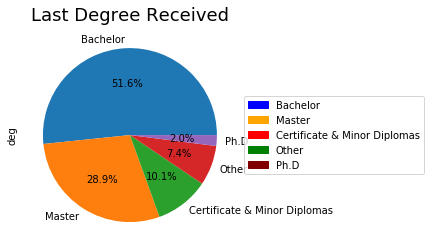

In [628]:
import matplotlib.patches as mpatches
pie = eduf['deg'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=['Bachelor','Master','Certificate & Minor Diplomas',
                                                                             'Other','Ph.D'])

pie.set_title("Last Degree Received", fontsize=18)

Bachelor = mpatches.Patch(color='blue', label='Bachelor')
Master = mpatches.Patch(color='orange', label='Master')
Certificate_minD = mpatches.Patch(color='red', label='Certificate & Minor Diplomas')
Other = mpatches.Patch(color='green', label='Other')
PhD = mpatches.Patch(color='maroon', label='Ph.D')
plt.legend(handles=[Bachelor,Master,Certificate_minD,Other,PhD], loc='center left', bbox_to_anchor=(1, 0.5))


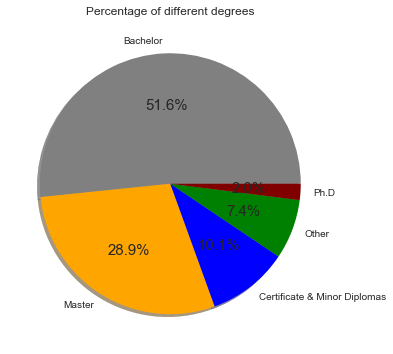

In [874]:
from pylab import rcParams
mpl.rcParams['font.size'] = 15.0
mpl.rcParams['lines.linewidth'] = 2
# Data to plot
sizes =eduf['deg'].value_counts(sort = True)
colors = ["grey","orange","blue","green", "maroon"] 
rcParams['figure.figsize'] = 8,6
# Plot
plt.pie(sizes, labels = ['Bachelor','Master','Certificate & Minor Diplomas','Other','Ph.D'], colors=colors, autopct='%1.1f%%', shadow=True, startangle=360,)
plt.title('Percentage of different degrees')
plt.show()

In [629]:
eduf.head()

,profile,category,deg
0,https://www.linkedin.com/in/abdel-abellard-007...,social sciences,Master
1,https://www.linkedin.com/in/abimaelle-chery-95...,social sciences,Other
2,https://www.linkedin.com/in/abischamma-grand-j...,Business administration,Bachelor
3,https://www.linkedin.com/in/achille-pierre-fil...,other,Master
4,https://www.linkedin.com/in/adelin-pierre-b5b9...,Natural sciences,Certificate & Minor Diplomas


In [637]:
onecode_education = pd.get_dummies(eduf[['category','deg']], prefix='', prefix_sep = '')

In [388]:
edu_check = eduf.reset_index()

In [390]:
edu_check.drop('Unnamed: 0', axis = 1, inplace = True)

In [393]:
edu_check['category'] = edu_check['category'].str.lower()

In [394]:
edu_check['category'].value_counts()

business administration    306
social sciences            204
technology                  87
engineering                 65
natural sciences            45
other                       42
health science              39
art                          8
Name: category, dtype: int64

In [551]:
onecode_education= pd.get_dummies(edu_check.category)

In [650]:
onecode_education = pd.concat([edu_check[['profile']], onecode_education], axis = 1)

In [652]:
onecode_education.head()

,profile,Business administration,Engineering,Natural sciences,Technology,art,business administration,engineering,health science,natural sciences,other,social sciences,technology,Bachelor,Certificate & Minor Diplomas,Master,Other,Ph.D
0,https://www.linkedin.com/in/abdel-abellard-007...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,https://www.linkedin.com/in/abimaelle-chery-95...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,https://www.linkedin.com/in/abischamma-grand-j...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,https://www.linkedin.com/in/achille-pierre-fil...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,https://www.linkedin.com/in/adelin-pierre-b5b9...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## I have a lot of cleaning to do , i was suppose to do it before the basic exploratory 

In [647]:
profile1 = experience_df[['profile']]

profile2 = skill_df[['profile']]

profile3 = education_df[['profile']]

profile = pd.concat([profile1,profile2,profile3])

profile.reset_index(inplace = True)

profile.drop('index', axis = 1, inplace = True)

profile.drop_duplicates(inplace = True)

profile.shape

(1094, 1)

In [648]:
onecode_education.head()

,Business administration,Engineering,Natural sciences,Technology,art,business administration,engineering,health science,natural sciences,other,social sciences,technology,Bachelor,Certificate & Minor Diplomas,Master,Other,Ph.D
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [717]:
final_dataset = pd.merge(profile,onecode_education, on = 'profile', how = 'left')
final_dataset = pd.merge(final_dataset, onecode_skill, on = 'profile', how = 'left')
final_dataset = pd.merge(final_dataset,experience_grp, on = 'profile', how = 'left')

In [718]:
cluster_dataset = final_dataset.fillna(0).drop(columns=['profile', 'exp_title'])

In [719]:
cluster_dataset.head()

,Business administration,Engineering,Natural sciences,Technology,art,business administration,engineering,health science,natural sciences,other_x,social sciences,technology,Bachelor,Certificate & Minor Diplomas,Master,Other,Ph.D,analysis & research,communication,creativity,education & formation,leadership & management,medicine & healthcare,other_y,technical & informations skills,periode
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.8
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2


In [720]:
from sklearn import preprocessing

In [721]:
x = cluster_dataset.values

scaler = preprocessing.StandardScaler()

x_scaled = min_max_scaler.fit_transform(x)

df_part_clustering = pd.DataFrame(x_scaled,columns =cluster_dataset.columns)

df_part_clustering

,Business administration,Engineering,Natural sciences,Technology,art,business administration,engineering,health science,natural sciences,other_x,social sciences,technology,Bachelor,Certificate & Minor Diplomas,Master,Other,Ph.D,analysis & research,communication,creativity,education & formation,leadership & management,medicine & healthcare,other_y,technical & informations skills,periode
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.666667,0.000000,0.000000,0.000000,0.110738
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.046980
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.666667,0.0,0.333333,0.000000,0.000000,0.000000,0.030201
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142617
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.120805
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.666667,0.000000,0.000000,0.000000,0.100671
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.666667,0.048658
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.666667,0.000000,0.000000,0.333333,0.065436
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.000000,0.000000,0.333333,0.333333,0.130872
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.025168


In [722]:
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

mpl.rcParams["figure.figsize"] = (9,6)

In [723]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

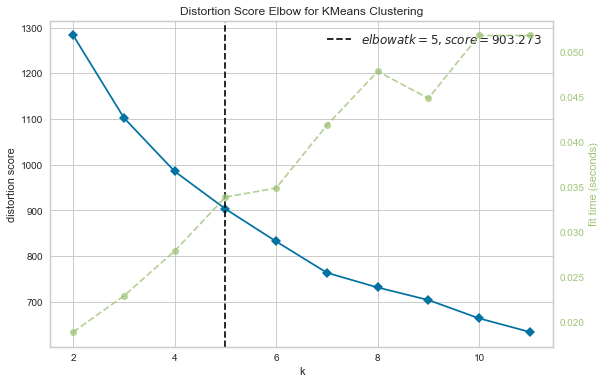

In [724]:
visualizer.fit(df_part_clustering)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [725]:
kclusters = 5

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_part_clustering)

kmeans.labels_

array([1, 1, 1, ..., 0, 1, 2])

In [726]:
final_dataset = final_dataset.fillna(0)

In [727]:
final_dataset.drop('exp_title', axis=1, inplace = True)

In [728]:
final_dataset.insert(0, 'Cluster Labels', kmeans.labels_)

In [729]:
final_dataset.head(10)

,Cluster Labels,profile,Business administration,Engineering,Natural sciences,Technology,art,business administration,engineering,health science,natural sciences,other_x,social sciences,technology,Bachelor,Certificate & Minor Diplomas,Master,Other,Ph.D,analysis & research,communication,creativity,education & formation,leadership & management,medicine & healthcare,other_y,technical & informations skills,periode
0,1,https://www.linkedin.com/in/joseph-melior-3a4a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.6
1,1,https://www.linkedin.com/in/alexandre-michel-0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8
2,1,https://www.linkedin.com/in/biento-jacques-871...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.8
3,4,https://www.linkedin.com/in/valery-fils-aime-6...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5
4,0,https://www.linkedin.com/in/mboute/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2
5,1,https://www.linkedin.com/in/maxglyron/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0
6,3,https://www.linkedin.com/in/slenky-rameau-4799...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.9
7,3,https://www.linkedin.com/in/neguerrewidmaer/,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,3.9
8,1,https://www.linkedin.com/in/alfred-alain-b7948...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,7.8
9,3,https://www.linkedin.com/in/josuestjean/,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.5


In [773]:
import seaborn as sns

## Examing the Clusters:

We have total of 6 clusters such as 0,1,2,3,4,5. Let us examine one after the other.

### Profile 1

In [1016]:
cluster_1 = final_dataset.loc[final_dataset['Cluster Labels'] == 0][['Cluster Labels','profile']]

#### Education 

In [1017]:
cluster_ed = pd.merge(cluster_1,eduf,on='profile',how='inner')

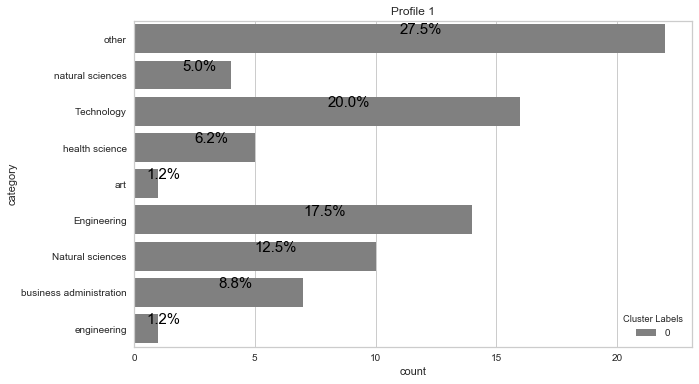

In [1019]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="category", hue='Cluster Labels', palette=["grey","orange","blue","green", "maroon"],  data=cluster_ed)
ax.set_title("Profile 1")

total = len(cluster_ed["category"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=15,color="black")  

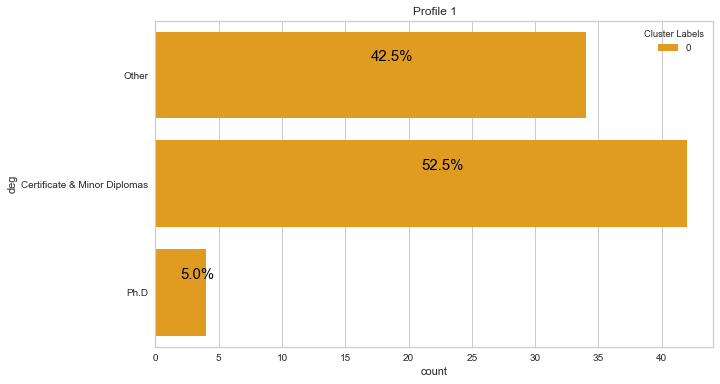

In [1020]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="deg", hue='Cluster Labels', palette=["orange","blue","green", "maroon"],  data=cluster_ed)
ax.set_title("Profile 1")

total = len(cluster_ed["deg"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=15,color="black")  

,category,count
0,Engineering,14
1,Natural sciences,10
2,Technology,16
3,art,1
4,business administration,7
5,engineering,1
6,health science,5
7,natural sciences,4
8,other,22


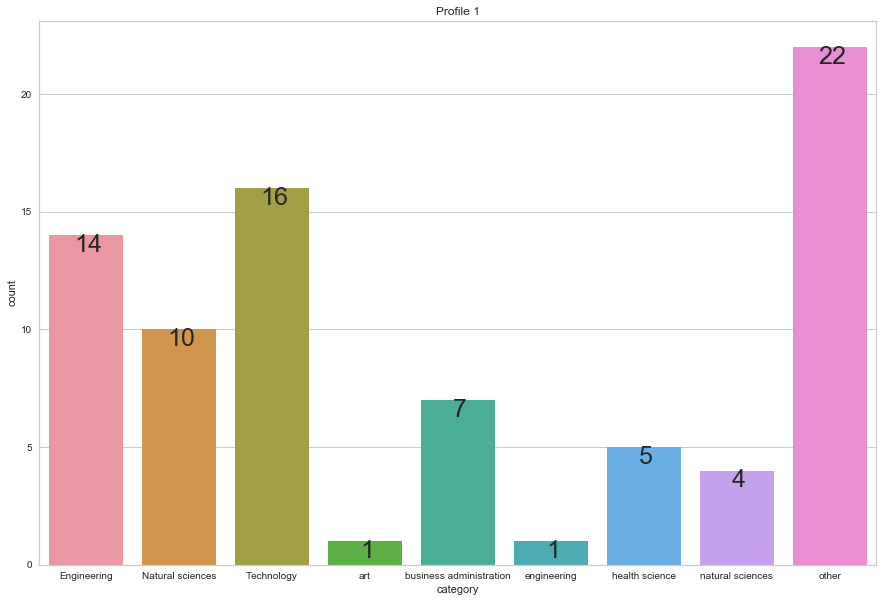

In [1010]:
demo_1 = pd.DataFrame(cluster_ed.groupby('category')[['category']].count()).rename(columns={'category':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="category", y="count", data=demo_1)
ax.set_title("Profile 1")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=25,
                   xytext = (2, -10), 
                   textcoords = 'offset points')

,deg,count
0,Certificate & Minor Diplomas,42
1,Other,34
2,Ph.D,4


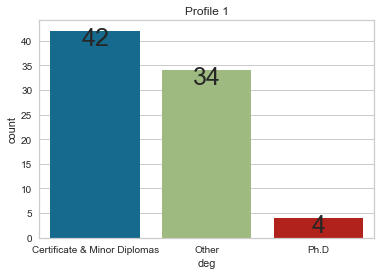

In [960]:
demo_1 = pd.DataFrame(cluster_ed.groupby('deg')[['deg']].count()).rename(columns={'deg':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="deg", y="count", data=demo_1)

ax.set_title("Profile 1")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=25,
                   xytext = (0, -8), 
                   textcoords = 'offset points')

#### Skill 

In [1021]:
cluster_ski = pd.merge(cluster_1,newskill_df,on='profile',how='inner')

In [1022]:
cluster_ski.rename(columns = {'category 2': 'category'}, inplace = True)

In [1023]:
cluster_ski.head()

,Cluster Labels,profile,skill,count,category
0,0,https://www.linkedin.com/in/formatel-center-75...,Leadership,114.0,leadership & management
1,0,https://www.linkedin.com/in/formatel-center-75...,Microsoft Office,204.0,technical & informations skills
2,0,https://www.linkedin.com/in/formatel-center-75...,Public Relations,21.0,leadership & management
3,0,https://www.linkedin.com/in/woodmy-jean-baptis...,Project Management,66.0,leadership & management
4,0,https://www.linkedin.com/in/woodmy-jean-baptis...,Leadership,114.0,leadership & management


,category,count
0,analysis & research,12
1,communication,57
2,creativity,24
3,education & formation,11
4,leadership & management,299
5,medicine & healthcare,12
6,other,25
7,technical & informations skills,253


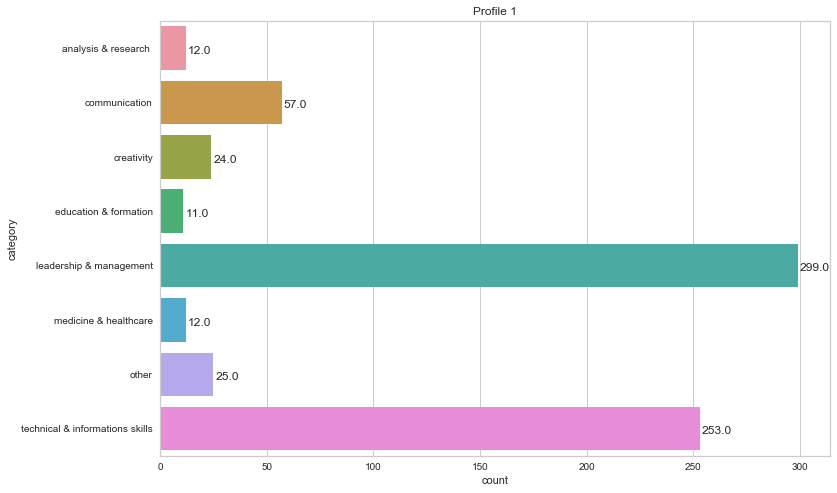

In [966]:
demo_1 = pd.DataFrame(cluster_ski.groupby('category')[['category']].count()).rename(columns={'category':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="count", y="category", data=demo_1)
ax.set_title("Profile 1")
for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() +1
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 12)

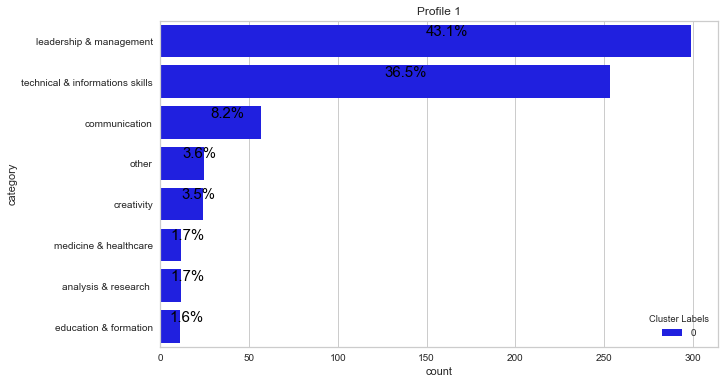

In [1024]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="category", hue='Cluster Labels', palette=["blue","green", "maroon"],  data=cluster_ski)
ax.set_title("Profile 1")

total = len(cluster_ski["category"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=15,color="black")

#### Experience

In [967]:
cluster_exp = pd.merge(cluster_1,experience_grp,on='profile',how='inner')

In [968]:
cluster_exp.head()

,Cluster Labels,profile,exp_title,periode
0,0,https://www.linkedin.com/in/mboute/,Co-Founder,7.2
1,0,https://www.linkedin.com/in/formatel-center-75...,OWNER,15.2
2,0,https://www.linkedin.com/in/woodmy-jean-baptis...,Co-Founder,5.5
3,0,https://www.linkedin.com/in/anderson-mejuste-a...,Software Programmer,1.8
4,0,https://www.linkedin.com/in/gilbert-biamby-006...,Deputy Director General,4.0


In [969]:
round(cluster_exp.periode.mean())

7

----

### Profile 2

In [1032]:
cluster_2 = final_dataset.loc[final_dataset['Cluster Labels'] == 1][['Cluster Labels','profile']]

#### Education

In [1033]:
cluster_ed = pd.merge(cluster_2,eduf,on='profile',how='inner')

,category,count
0,social sciences,182


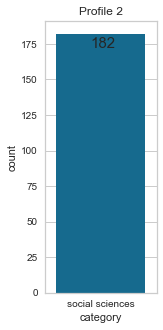

In [972]:
demo_1 = pd.DataFrame(cluster_ed.groupby('category')[['category']].count()).rename(columns={'category':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(2, 5))
ax = sns.barplot(x="category", y="count", data=demo_1)
ax.set_title("Profile 2")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (2, -10), 
                   textcoords = 'offset points')

,deg,count
0,Bachelor,142
1,Certificate & Minor Diplomas,15
2,Other,14
3,Ph.D,11


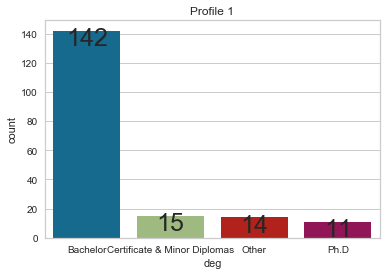

In [1034]:
demo_1 = pd.DataFrame(cluster_ed.groupby('deg')[['deg']].count()).rename(columns={'deg':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="deg", y="count", data=demo_1)

ax.set_title("Profile 1")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=25,
                   xytext = (0, -8), 
                   textcoords = 'offset points')

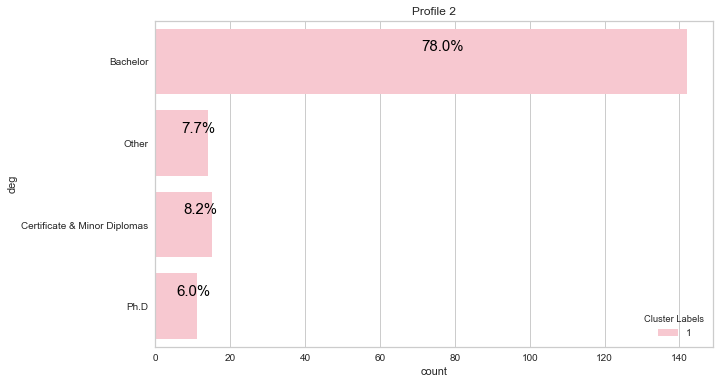

In [1036]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="deg", hue='Cluster Labels', palette=["pink"],  data=cluster_ed)
ax.set_title("Profile 2")

total = len(cluster_ed["deg"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=15,color="black")

#### Skill

In [1037]:
cluster_ski = pd.merge(cluster_2,newskill_df,on='profile',how='inner')
cluster_ski.rename(columns = {'category 2': 'category'}, inplace = True)
cluster_ski.head()

,Cluster Labels,profile,skill,count,category
0,1,https://www.linkedin.com/in/joseph-melior-3a4a...,Strategic Planning,66.0,leadership & management
1,1,https://www.linkedin.com/in/joseph-melior-3a4a...,Public Speaking,61.0,communication
2,1,https://www.linkedin.com/in/joseph-melior-3a4a...,Business Strategy,12.0,leadership & management
3,1,https://www.linkedin.com/in/biento-jacques-871...,Graphic Design,6.0,creativity
4,1,https://www.linkedin.com/in/biento-jacques-871...,Video Production,2.0,creativity


,category,count
0,analysis & research,11
1,communication,54
2,creativity,18
3,education & formation,14
4,leadership & management,163
5,medicine & healthcare,1
6,other,16
7,technical & informations skills,121


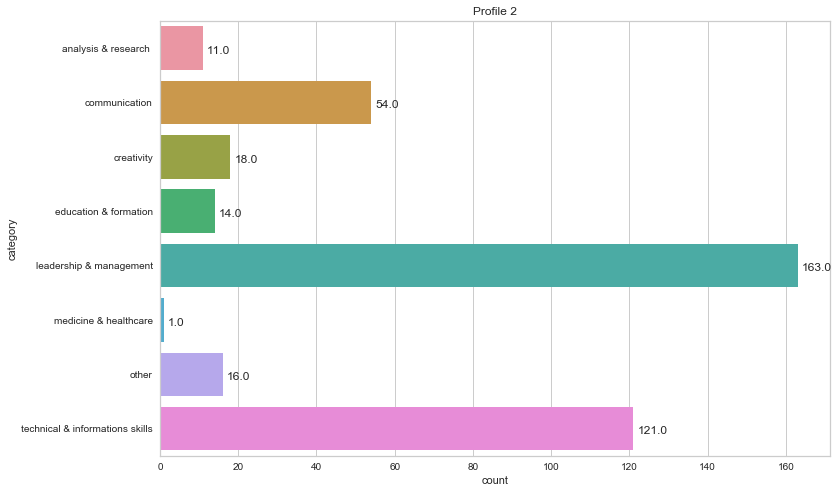

In [974]:
demo_1 = pd.DataFrame(cluster_ski.groupby('category')[['category']].count()).rename(columns={'category':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="count", y="category", data=demo_1)
ax.set_title("Profile 2")
for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() +1
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 12)

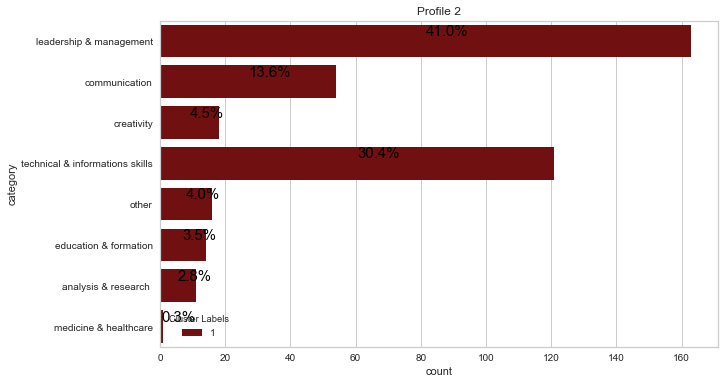

In [1038]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="category", hue='Cluster Labels', palette=["maroon"],  data=cluster_ski)
ax.set_title("Profile 2")

total = len(cluster_ski["category"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=15,color="black")

#### Experience

In [975]:
cluster_exp = pd.merge(cluster_2,experience_grp,on='profile',how='inner')
cluster_exp.head()

,Cluster Labels,profile,exp_title,periode
0,1,https://www.linkedin.com/in/joseph-melior-3a4a...,CEO,6.6
1,1,https://www.linkedin.com/in/alexandre-michel-0...,Rédacteur,2.8
2,1,https://www.linkedin.com/in/biento-jacques-871...,Co-Founder,1.8
3,1,https://www.linkedin.com/in/maxglyron/,Head of IT and Digital Communications,6.0
4,1,https://www.linkedin.com/in/alfred-alain-b7948...,Directeur,7.8


In [976]:
round(cluster_exp.periode.mean())

6

### Profile 3

In [1046]:
cluster_3 = final_dataset.loc[final_dataset['Cluster Labels'] == 2][['Cluster Labels','profile']]

#### Education

In [1047]:
cluster_ed = pd.merge(cluster_3,eduf,on='profile',how='inner')

,category,count
0,Business administration,137


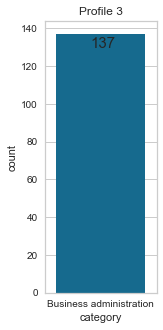

In [979]:
demo_1 = pd.DataFrame(cluster_ed.groupby('category')[['category']].count()).rename(columns={'category':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(2, 5))
ax = sns.barplot(x="category", y="count", data=demo_1)
ax.set_title("Profile 3")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (2, -10), 
                   textcoords = 'offset points')

,deg,count
0,Bachelor,102
1,Certificate & Minor Diplomas,23
2,Other,11
3,Ph.D,1


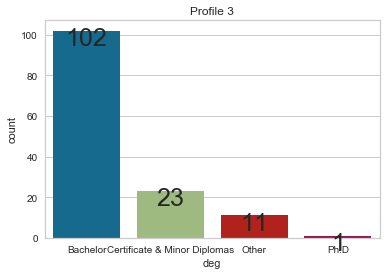

In [1043]:
demo_1 = pd.DataFrame(cluster_ed.groupby('deg')[['deg']].count()).rename(columns={'deg':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="deg", y="count", data=demo_1)

ax.set_title("Profile 3")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=25,
                   xytext = (0, -8), 
                   textcoords = 'offset points')

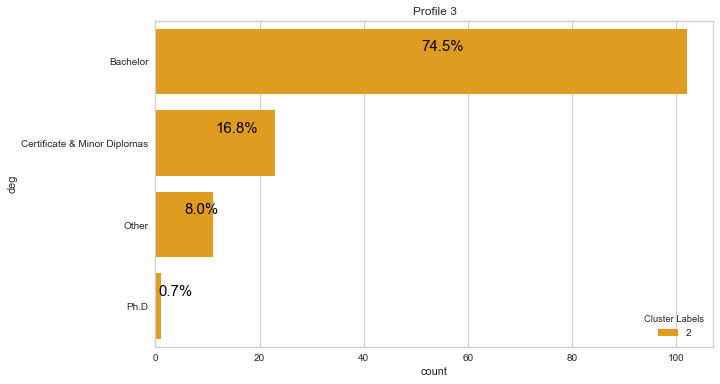

In [1048]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="deg", hue='Cluster Labels', palette=["orange"],  data=cluster_ed)
ax.set_title("Profile 3")

total = len(cluster_ed["deg"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=15,color="black")

#### skill

In [1044]:
cluster_ski = pd.merge(cluster_3,newskill_df,on='profile',how='inner')
cluster_ski.rename(columns = {'category 2': 'category'}, inplace = True)
cluster_ski.head()

,Cluster Labels,profile,skill,count,category
0,2,https://www.linkedin.com/in/mie-christine-plat...,Management,121.0,leadership & management
1,2,https://www.linkedin.com/in/mie-christine-plat...,Telecommunications,31.0,technical & informations skills
2,2,https://www.linkedin.com/in/mie-christine-plat...,Team Leadership,13.0,leadership & management
3,2,https://www.linkedin.com/in/pierre-philippe-ag...,Strategic Planning,66.0,leadership & management
4,2,https://www.linkedin.com/in/pierre-philippe-ag...,Public Speaking,61.0,communication


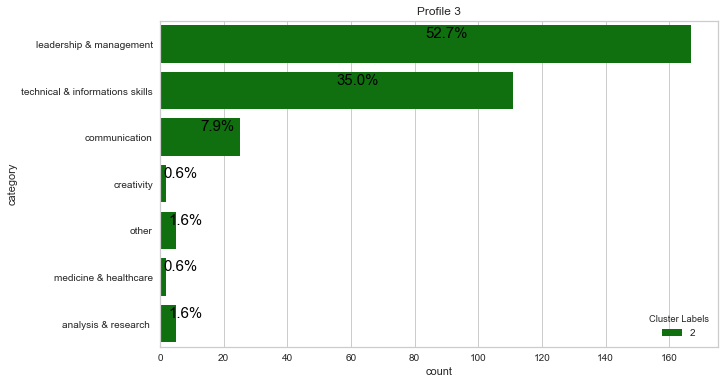

In [1049]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="category", hue='Cluster Labels', palette=["green"],  data=cluster_ski)
ax.set_title("Profile 3")

total = len(cluster_ski["category"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=15,color="black")

,category,count
0,analysis & research,5
1,communication,25
2,creativity,2
3,leadership & management,167
4,medicine & healthcare,2
5,other,5
6,technical & informations skills,111


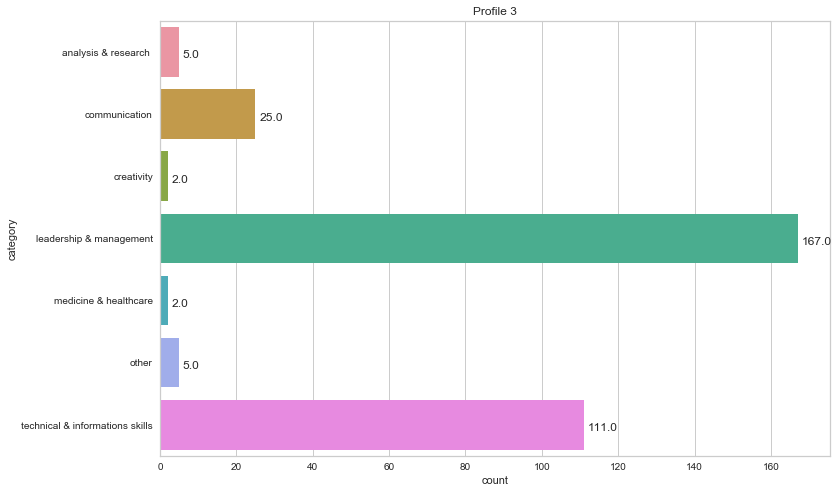

In [982]:
demo_1 = pd.DataFrame(cluster_ski.groupby('category')[['category']].count()).rename(columns={'category':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="count", y="category", data=demo_1)
ax.set_title("Profile 3")
for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() +1
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 12)

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="category", hue='Cluster Labels', palette=["pink"],  data=cluster_ski)
ax.set_title("Profile 2")

total = len(cluster_ski["category"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=15,color="black")

#### Experience

In [983]:
cluster_exp = pd.merge(cluster_3,experience_grp,on='profile',how='inner')
cluster_exp.head()

,Cluster Labels,profile,exp_title,periode
0,2,https://www.linkedin.com/in/cinthia-eliassaint...,Officier admin et finance,2.4
1,2,https://www.linkedin.com/in/mie-christine-plat...,Executive Assistant Chairman Office,13.2
2,2,https://www.linkedin.com/in/pierre-philippe-ag...,Haiti Presidential Candidate 2015,7.7
3,2,https://www.linkedin.com/in/gregorymevs/,Co Chairman,40.0
4,2,https://www.linkedin.com/in/stania-joujoute-97...,Book Seller,1.2


In [984]:
round(cluster_exp.periode.mean())

5

### Profile 4

In [985]:
cluster_4 = final_dataset.loc[final_dataset['Cluster Labels'] == 3][['Cluster Labels','profile']]

#### Education

In [986]:
cluster_ed = pd.merge(cluster_4,eduf,on='profile',how='inner')

,category,count
0,Engineering,35
1,Natural sciences,5
2,Technology,39
3,art,1
4,business administration,28
5,engineering,4
6,health science,2
7,natural sciences,13
8,other,39
9,technology,1


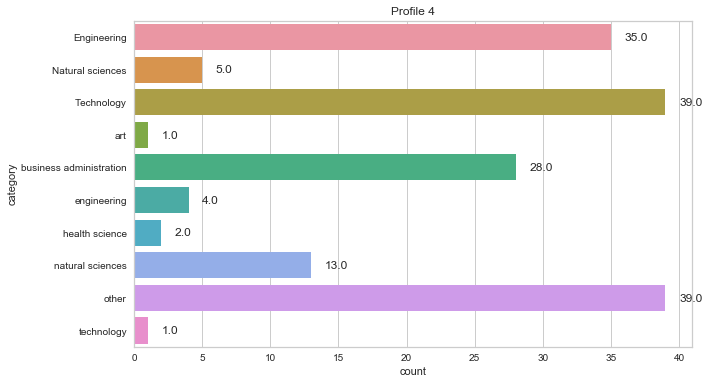

In [987]:
demo_1 = pd.DataFrame(cluster_ed.groupby('category')[['category']].count()).rename(columns={'category':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="count", y="category", data=demo_1)
ax.set_title("Profile 4")
for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() +1
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 12)

#### Skill

In [991]:
cluster_ski = pd.merge(cluster_4,newskill_df,on='profile',how='inner')
cluster_ski.rename(columns = {'category 2': 'category'}, inplace = True)
cluster_ski.head()

,Cluster Labels,profile,skill,count,category
0,3,https://www.linkedin.com/in/slenky-rameau-4799...,Customer Service,78.0,leadership & management
1,3,https://www.linkedin.com/in/slenky-rameau-4799...,Microsoft Excel,130.0,technical & informations skills
2,3,https://www.linkedin.com/in/slenky-rameau-4799...,Microsoft Word,55.0,technical & informations skills
3,3,https://www.linkedin.com/in/neguerrewidmaer/,Gestion de la maintenance,1.0,leadership & management
4,3,https://www.linkedin.com/in/neguerrewidmaer/,Gestion de la production,1.0,leadership & management


,category,count
0,analysis & research,14
1,communication,18
2,creativity,7
3,education & formation,3
4,leadership & management,132
5,medicine & healthcare,1
6,other,6
7,technical & informations skills,205


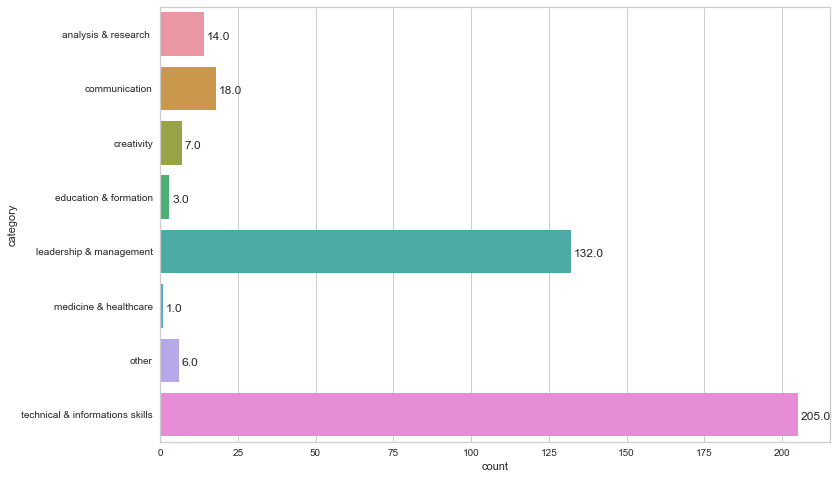

In [992]:
demo_1 = pd.DataFrame(cluster_ski.groupby('category')[['category']].count()).rename(columns={'category':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(12, 8))
ax.set_title("Profile 4")
ax = sns.barplot(x="count", y="category", data=demo_1)
for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() +1
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 12)

#### Experience

In [993]:
cluster_exp = pd.merge(cluster_4,experience_grp,on='profile',how='inner')
cluster_exp.head()

,Cluster Labels,profile,exp_title,periode
0,3,https://www.linkedin.com/in/slenky-rameau-4799...,Chief Executive Officer,2.9
1,3,https://www.linkedin.com/in/neguerrewidmaer/,Ingénieur Chef de chantier en installation ele...,3.9
2,3,https://www.linkedin.com/in/josuestjean/,General Manager,1.5
3,3,https://www.linkedin.com/in/louis-frantz-augus...,Credit Officer,2.8
4,3,https://www.linkedin.com/in/st%C3%A9phania-pet...,District Manager,3.3


In [994]:
round(cluster_exp.periode.mean())

5

### Profile 5

In [995]:
cluster_5 = final_dataset.loc[final_dataset['Cluster Labels'] == 4][['Cluster Labels','profile']]

#### Education

In [996]:
cluster_ed = pd.merge(cluster_5,eduf,on='profile',how='inner')

,category,count
0,Business administration,30
1,Engineering,2
2,Natural sciences,4
3,Technology,27
4,business administration,21
5,engineering,1
6,health science,24
7,natural sciences,8
8,other,17
9,social sciences,95


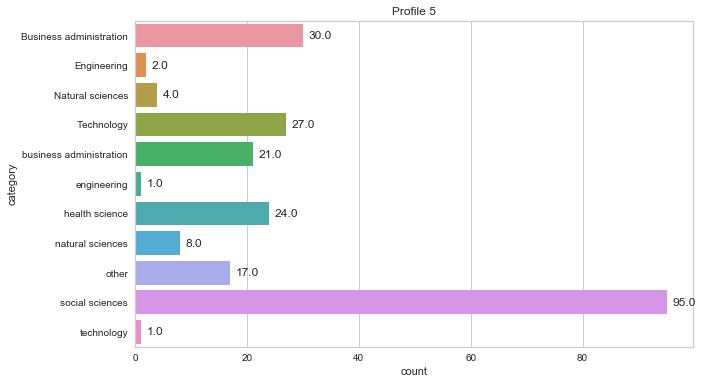

In [997]:
demo_1 = pd.DataFrame(cluster_ed.groupby('category')[['category']].count()).rename(columns={'category':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="count", y="category", data=demo_1)
ax.set_title("Profile 5")
for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() +1
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 12)

#### Skill

In [999]:
cluster_ski = pd.merge(cluster_5,newskill_df,on='profile',how='inner')
cluster_ski.rename(columns = {'category 2': 'category'}, inplace = True)
cluster_ski.head()

,Cluster Labels,profile,skill,count,category
0,4,https://www.linkedin.com/in/lunise-jules-8056a...,Community Development,9.0,leadership & management
1,4,https://www.linkedin.com/in/lunise-jules-8056a...,Capacity Building,16.0,leadership & management
2,4,https://www.linkedin.com/in/lunise-jules-8056a...,Nonprofits,30.0,leadership & management
3,4,https://www.linkedin.com/in/carl-emmanuel-maur...,Public Speaking,61.0,communication
4,4,https://www.linkedin.com/in/carl-emmanuel-maur...,Leadership,114.0,leadership & management


,category,count
0,analysis & research,25
1,communication,40
2,creativity,4
3,education & formation,6
4,leadership & management,194
5,medicine & healthcare,24
6,other,22
7,technical & informations skills,149


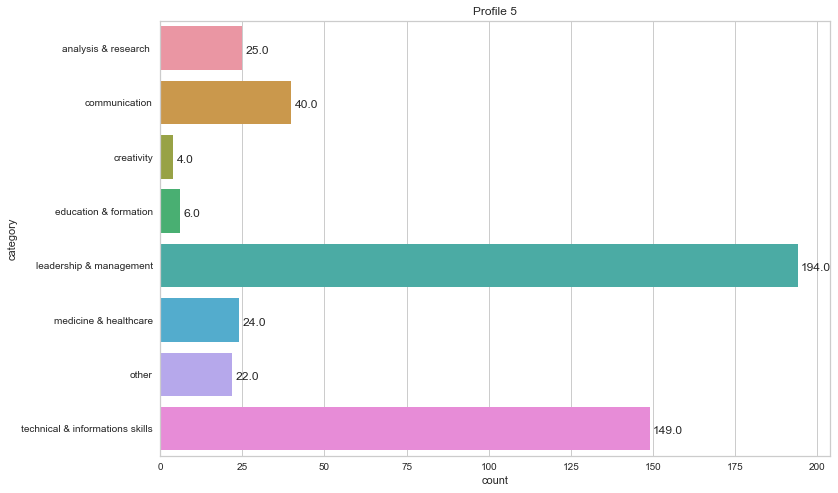

In [1001]:
demo_1 = pd.DataFrame(cluster_ski.groupby('category')[['category']].count()).rename(columns={'category':'count'}).reset_index(level=0)
display(demo_1)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="count", y="category", data=demo_1)
ax.set_title("Profile 5")
for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() +1
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 12)

#### Experience

In [916]:
cluster_exp = pd.merge(cluster_4,experience_grp,on='profile',how='inner')
cluster_exp.head()

,Cluster Labels,profile,exp_title,periode
0,3,https://www.linkedin.com/in/slenky-rameau-4799...,Chief Executive Officer,2.9
1,3,https://www.linkedin.com/in/neguerrewidmaer/,Ingénieur Chef de chantier en installation ele...,3.9
2,3,https://www.linkedin.com/in/josuestjean/,General Manager,1.5
3,3,https://www.linkedin.com/in/louis-frantz-augus...,Credit Officer,2.8
4,3,https://www.linkedin.com/in/st%C3%A9phania-pet...,District Manager,3.3


In [917]:
round(cluster_exp.periode.mean())

5

## Step Cleaning

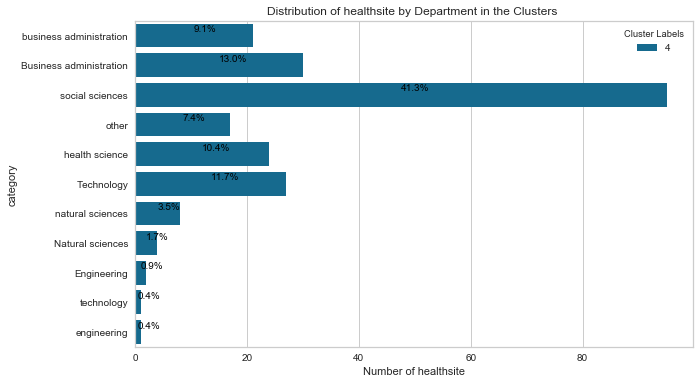

In [1003]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="category", hue='Cluster Labels', data=cluster_ed)
plt.title('Distribution of healthsite by Department in the Clusters ')
plt.xlabel('Number of healthsite')
total = len(cluster_ed["category"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=10,color="black")  

In [ ]:
colors = ["grey","orange","blue","green", "maroon"]